In [1]:
import pandas as pd

print(f"{'pandas':<11} {pd.__version__:<6}")

import numpy as np

print(f"{'numpy':<11} {np.__version__:<6}")

import plotly

print(f"{'plotly':<11} {pd.__version__:<6}")

import matplotlib
import matplotlib.pyplot as plt
print(f"{'matplotlib':<11} {matplotlib.__version__:<6}")

import itertools

from adtk import __version__ as adtk_version

print(f"{'adtk':<11} {adtk_version:<6}")

from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import ThresholdAD
from adtk.detector import QuantileAD
from adtk.detector import InterQuartileRangeAD
from adtk.detector import PersistAD
from adtk.detector import LevelShiftAD
from adtk.detector import VolatilityShiftAD
from adtk.detector import SeasonalAD
from adtk.detector import AutoregressionAD
from adtk.detector import MinClusterDetector
from adtk.detector import OutlierDetector
from adtk.detector import PcaAD
from adtk.detector import GeneralizedESDTestAD

from adtk.data import validate_series
from adtk.visualization import plot

from sklearn import __version__ as sklearn_version

print(f"{'sklearn':<11} {sklearn_version:<6}")
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import KMeans

from io import StringIO
from support.convertion import load_conversion_from
from support.parsers import p2f
from support.parsers import d2d
from datetime import datetime, timedelta
from typing import List, Dict

# plt.rcParams["figure.figsize"] = [14, 10]
# plt.style.use("ggplot")

%matplotlib inline
%load_ext autoreload
%autoreload 2

pandas      1.1.3 
numpy       1.19.1
plotly      1.1.3 
matplotlib  3.3.1 
adtk        0.6.2 
sklearn     0.23.2


/Users/contingencia/miniconda3/envs/ddatos21_ment_tp3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<AxesSubplot:title={'center':'Dist'}>

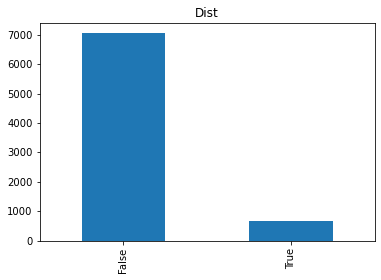

In [2]:
df0: pd.DataFrame = pd.read_csv(
    "datasets/traffic_AR_CL_UY+features+column_classifier.csv",
    parse_dates=["Fecha"]
)

df0["Fecha"] = pd.to_datetime(df0["Fecha"], utc=True)

df0["anomaly"].value_counts().plot(kind='bar', 
                                     title='Dist')

In [3]:
import plotly.graph_objects as go


def anomaly_plot(
    ts=None, anomaly=None, anomaly_color: str = "red", mode: str = "markers", title=""
):

    df: pd.DataFrame = None
    anomalies: pd.DataFrame = None

    if ts is not None:
        # type check for ts
        if isinstance(ts, pd.Series):
            if ts.name is None:
                df = ts.to_frame("Time Series")
            else:
                df = ts.to_frame()
        elif isinstance(ts, pd.DataFrame):
            df = ts.copy()
        else:
            raise TypeError("Argument `ts` must be a pandas Series or DataFrame.")

        # check series index
        if not isinstance(df.index, pd.DatetimeIndex):
            raise TypeError(
                "Index of the input time series must be a pandas "
                "DatetimeIndex object."
            )

        # check duplicated column names
        if df.columns.duplicated().any():
            raise ValueError("Input DataFrame must have unique column names.")

    else:  # no time series, just event
        df = pd.DataFrame(dtype=int)

    # plot anomaly
    if anomaly is not None:
        pass
    else:
        raise ValueError("Anomaly values should be provided")

    if isinstance(anomaly, pd.Series):

        anomaly: pd.Series = anomaly
        idx: pd.DatetimeIndex = anomaly[anomaly == True].index

        if anomaly.name in df.columns:
            anomalies: pd.DataFrame = df.loc[idx][anomaly.name].to_frame()
        else:
            anomalies: pd.DataFrame = df.loc[idx]
    elif isinstance(anomaly, pd.DataFrame):
        anomaly: pd.DataFrame = anomaly
        anomalies: pd.DataFrame = pd.DataFrame(columns=df.columns)
        for anomaly_name in anomaly.columns:
            if anomaly_name in df.columns:
                anomalies = pd.concat(anomalies, df.loc[anomaly[anomaly_name] == True])

    fig = go.Figure()

    for column_name in df.columns:
        # Add scatter trace for line
        fig.add_trace(
            go.Scatter(x=df.index, y=df[column_name], mode="lines", name=column_name)
        )
    for column_name in anomalies.columns:
        fig.add_trace(
            go.Scatter(
                x=anomalies.index,
                y=anomalies[column_name],
                mode="markers",
                marker=dict(
                    color="LightSkyBlue",
                    size=6,
                    opacity=0.5,
                    line=dict(color="red", width=2),
                ),
                showlegend=False,
            ),
        )
    fig.update_layout(
        title={"text": title,}
    )
    fig.show()

In [4]:
# Model Evaluation
from sklearn.metrics import confusion_matrix

def confusion_matrix_plot( Y_test, Y_preds ):

    conf_mat = confusion_matrix(Y_test, Y_preds)
    print(conf_mat)
    with plt.style.context(('ggplot', 'seaborn')):
        fig = plt.figure(figsize=(6,6), num=1)
        plt.imshow(conf_mat, interpolation='nearest',cmap= plt.cm.Blues )
        plt.xticks([0,1],[0,1])
        plt.yticks([0,1],[0,1])
        plt.xlabel('Predicted Label')
        plt.ylabel('Actual Label')
        for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
                    plt.text(j, i,conf_mat[i, j], horizontalalignment="center",color="red")
        plt.grid(None)
        plt.title('Confusion Matrix')
        plt.colorbar()
        plt.show()



In [5]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support

def print_report( Y_test, Y_preds ):
    print('Precision                                   : %.3f'%precision_score(Y_test, Y_preds))
    print('Recall                                      : %.3f'%recall_score(Y_test, Y_preds))
    print('F1-Score                                    : %.3f'%f1_score(Y_test, Y_preds))
    print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(Y_test, Y_preds))
    print('\nClassification Report                       : ')
    print(classification_report(Y_test, Y_preds))

['MLA', 'MLC', 'MLU']
['cart', 'direct']
['Android', 'Desktop', 'Mobile', 'iOS']


[[391  50]
 [ 32  15]]


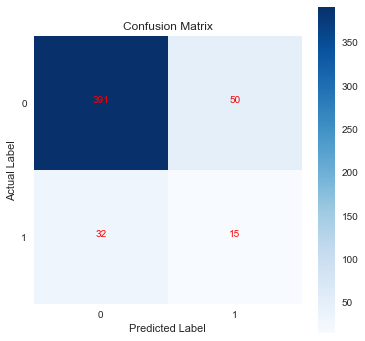

Precision                                   : 0.231
Recall                                      : 0.319
F1-Score                                    : 0.268

Precision Recall F1-Score Support Per Class : 
 (array([0.92434988, 0.23076923]), array([0.88662132, 0.31914894]), array([0.90509259, 0.26785714]), array([441,  47]))

Classification Report                       : 
              precision    recall  f1-score   support

       False       0.92      0.89      0.91       441
        True       0.23      0.32      0.27        47

    accuracy                           0.83       488
   macro avg       0.58      0.60      0.59       488
weighted avg       0.86      0.83      0.84       488



[[402  50]
 [ 20  16]]


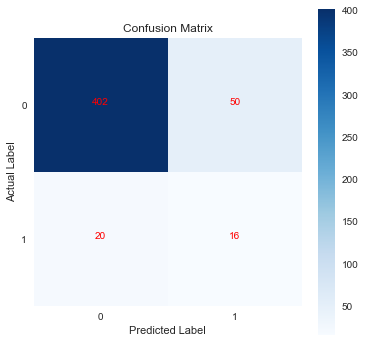

Precision                                   : 0.242
Recall                                      : 0.444
F1-Score                                    : 0.314

Precision Recall F1-Score Support Per Class : 
 (array([0.95260664, 0.24242424]), array([0.88938053, 0.44444444]), array([0.91990847, 0.31372549]), array([452,  36]))

Classification Report                       : 
              precision    recall  f1-score   support

       False       0.95      0.89      0.92       452
        True       0.24      0.44      0.31        36

    accuracy                           0.86       488
   macro avg       0.60      0.67      0.62       488
weighted avg       0.90      0.86      0.88       488



[[375  63]
 [ 26  24]]


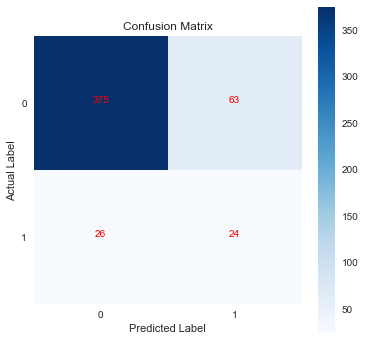

Precision                                   : 0.276
Recall                                      : 0.480
F1-Score                                    : 0.350

Precision Recall F1-Score Support Per Class : 
 (array([0.93516209, 0.27586207]), array([0.85616438, 0.48      ]), array([0.89392133, 0.35036496]), array([438,  50]))

Classification Report                       : 
              precision    recall  f1-score   support

       False       0.94      0.86      0.89       438
        True       0.28      0.48      0.35        50

    accuracy                           0.82       488
   macro avg       0.61      0.67      0.62       488
weighted avg       0.87      0.82      0.84       488



[[390  62]
 [ 17  19]]


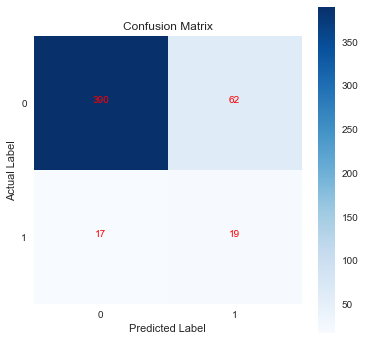

Precision                                   : 0.235
Recall                                      : 0.528
F1-Score                                    : 0.325

Precision Recall F1-Score Support Per Class : 
 (array([0.95823096, 0.2345679 ]), array([0.86283186, 0.52777778]), array([0.9080326 , 0.32478632]), array([452,  36]))

Classification Report                       : 
              precision    recall  f1-score   support

       False       0.96      0.86      0.91       452
        True       0.23      0.53      0.32        36

    accuracy                           0.84       488
   macro avg       0.60      0.70      0.62       488
weighted avg       0.90      0.84      0.87       488



[[436   0]
 [ 29  23]]


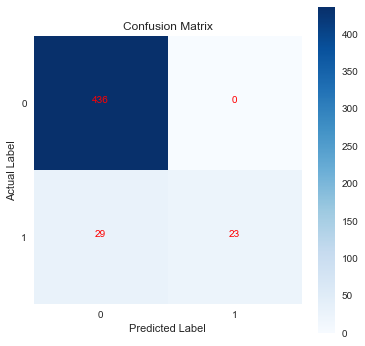

Precision                                   : 1.000
Recall                                      : 0.442
F1-Score                                    : 0.613

Precision Recall F1-Score Support Per Class : 
 (array([0.93763441, 1.        ]), array([1.        , 0.44230769]), array([0.96781354, 0.61333333]), array([436,  52]))

Classification Report                       : 
              precision    recall  f1-score   support

       False       0.94      1.00      0.97       436
        True       1.00      0.44      0.61        52

    accuracy                           0.94       488
   macro avg       0.97      0.72      0.79       488
weighted avg       0.94      0.94      0.93       488



[[439   0]
 [ 46   3]]


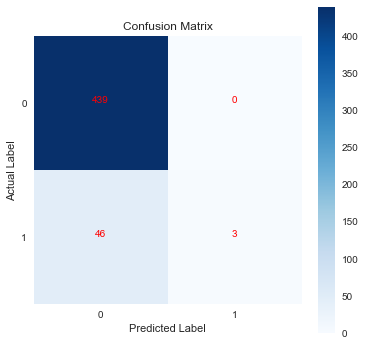

Precision                                   : 1.000
Recall                                      : 0.061
F1-Score                                    : 0.115

Precision Recall F1-Score Support Per Class : 
 (array([0.90515464, 1.        ]), array([1.        , 0.06122449]), array([0.95021645, 0.11538462]), array([439,  49]))

Classification Report                       : 
              precision    recall  f1-score   support

       False       0.91      1.00      0.95       439
        True       1.00      0.06      0.12        49

    accuracy                           0.91       488
   macro avg       0.95      0.53      0.53       488
weighted avg       0.91      0.91      0.87       488



[[439   0]
 [ 48   1]]


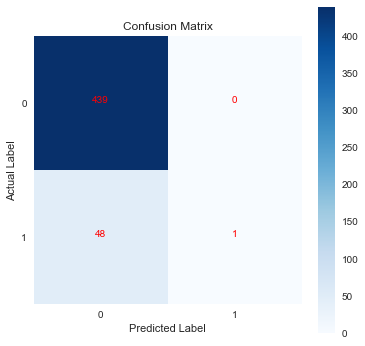

Precision                                   : 1.000
Recall                                      : 0.020
F1-Score                                    : 0.040

Precision Recall F1-Score Support Per Class : 
 (array([0.90143737, 1.        ]), array([1.        , 0.02040816]), array([0.94816415, 0.04      ]), array([439,  49]))

Classification Report                       : 
              precision    recall  f1-score   support

       False       0.90      1.00      0.95       439
        True       1.00      0.02      0.04        49

    accuracy                           0.90       488
   macro avg       0.95      0.51      0.49       488
weighted avg       0.91      0.90      0.86       488



[[393  57]
 [ 19  19]]


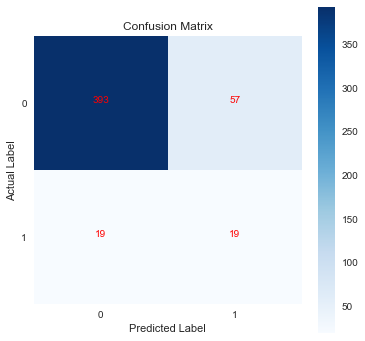

Precision                                   : 0.250
Recall                                      : 0.500
F1-Score                                    : 0.333

Precision Recall F1-Score Support Per Class : 
 (array([0.9538835, 0.25     ]), array([0.87333333, 0.5       ]), array([0.91183295, 0.33333333]), array([450,  38]))

Classification Report                       : 
              precision    recall  f1-score   support

       False       0.95      0.87      0.91       450
        True       0.25      0.50      0.33        38

    accuracy                           0.84       488
   macro avg       0.60      0.69      0.62       488
weighted avg       0.90      0.84      0.87       488



[[4 0]
 [1 1]]


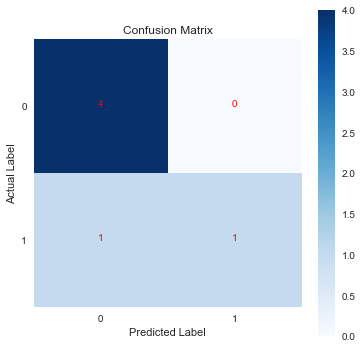

Precision                                   : 1.000
Recall                                      : 0.500
F1-Score                                    : 0.667

Precision Recall F1-Score Support Per Class : 
 (array([0.8, 1. ]), array([1. , 0.5]), array([0.88888889, 0.66666667]), array([4, 2]))

Classification Report                       : 
              precision    recall  f1-score   support

       False       0.80      1.00      0.89         4
        True       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



[[4 0]
 [1 1]]


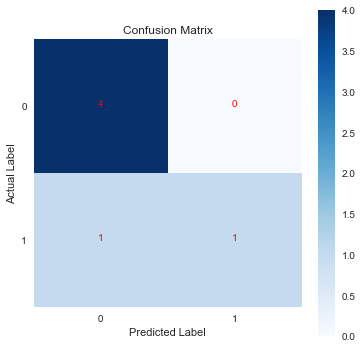

Precision                                   : 1.000
Recall                                      : 0.500
F1-Score                                    : 0.667

Precision Recall F1-Score Support Per Class : 
 (array([0.8, 1. ]), array([1. , 0.5]), array([0.88888889, 0.66666667]), array([4, 2]))

Classification Report                       : 
              precision    recall  f1-score   support

       False       0.80      1.00      0.89         4
        True       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



[[423   0]
 [ 31   7]]


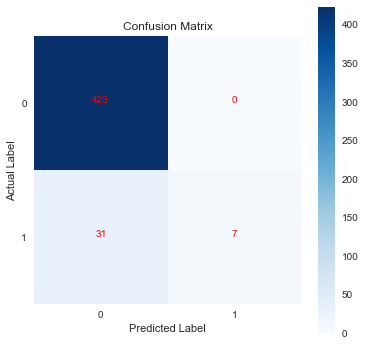

Precision                                   : 1.000
Recall                                      : 0.184
F1-Score                                    : 0.311

Precision Recall F1-Score Support Per Class : 
 (array([0.93171806, 1.        ]), array([1.        , 0.18421053]), array([0.96465222, 0.31111111]), array([423,  38]))

Classification Report                       : 
              precision    recall  f1-score   support

       False       0.93      1.00      0.96       423
        True       1.00      0.18      0.31        38

    accuracy                           0.93       461
   macro avg       0.97      0.59      0.64       461
weighted avg       0.94      0.93      0.91       461



[[454   0]
 [ 31   3]]


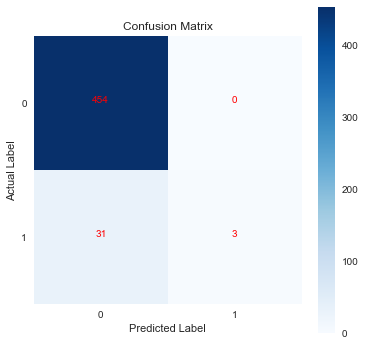

Precision                                   : 1.000
Recall                                      : 0.088
F1-Score                                    : 0.162

Precision Recall F1-Score Support Per Class : 
 (array([0.93608247, 1.        ]), array([1.        , 0.08823529]), array([0.96698616, 0.16216216]), array([454,  34]))

Classification Report                       : 
              precision    recall  f1-score   support

       False       0.94      1.00      0.97       454
        True       1.00      0.09      0.16        34

    accuracy                           0.94       488
   macro avg       0.97      0.54      0.56       488
weighted avg       0.94      0.94      0.91       488



[[453   0]
 [ 34   1]]


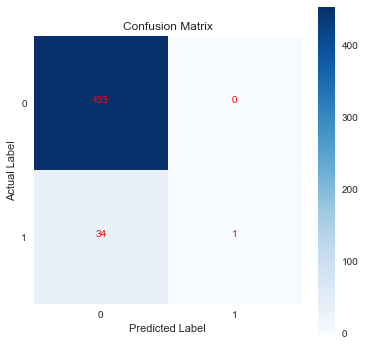

Precision                                   : 1.000
Recall                                      : 0.029
F1-Score                                    : 0.056

Precision Recall F1-Score Support Per Class : 
 (array([0.9301848, 1.       ]), array([1.        , 0.02857143]), array([0.96382979, 0.05555556]), array([453,  35]))

Classification Report                       : 
              precision    recall  f1-score   support

       False       0.93      1.00      0.96       453
        True       1.00      0.03      0.06        35

    accuracy                           0.93       488
   macro avg       0.97      0.51      0.51       488
weighted avg       0.94      0.93      0.90       488



[[367  62]
 [ 18  14]]


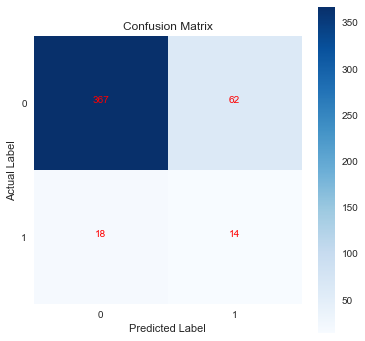

Precision                                   : 0.184
Recall                                      : 0.438
F1-Score                                    : 0.259

Precision Recall F1-Score Support Per Class : 
 (array([0.95324675, 0.18421053]), array([0.85547786, 0.4375    ]), array([0.9017199 , 0.25925926]), array([429,  32]))

Classification Report                       : 
              precision    recall  f1-score   support

       False       0.95      0.86      0.90       429
        True       0.18      0.44      0.26        32

    accuracy                           0.83       461
   macro avg       0.57      0.65      0.58       461
weighted avg       0.90      0.83      0.86       461



[[418   0]
 [ 23  20]]


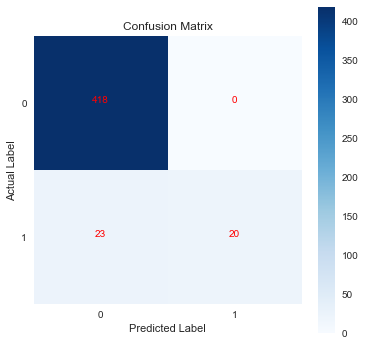

Precision                                   : 1.000
Recall                                      : 0.465
F1-Score                                    : 0.635

Precision Recall F1-Score Support Per Class : 
 (array([0.9478458, 1.       ]), array([1.        , 0.46511628]), array([0.97322468, 0.63492063]), array([418,  43]))

Classification Report                       : 
              precision    recall  f1-score   support

       False       0.95      1.00      0.97       418
        True       1.00      0.47      0.63        43

    accuracy                           0.95       461
   macro avg       0.97      0.73      0.80       461
weighted avg       0.95      0.95      0.94       461



[[445   0]
 [ 40   3]]


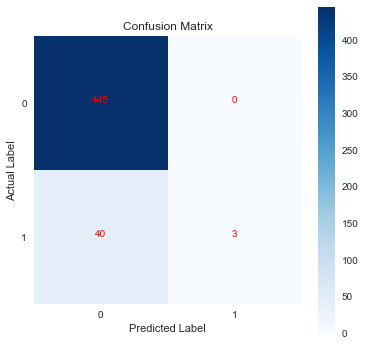

Precision                                   : 1.000
Recall                                      : 0.070
F1-Score                                    : 0.130

Precision Recall F1-Score Support Per Class : 
 (array([0.91752577, 1.        ]), array([1.        , 0.06976744]), array([0.95698925, 0.13043478]), array([445,  43]))

Classification Report                       : 
              precision    recall  f1-score   support

       False       0.92      1.00      0.96       445
        True       1.00      0.07      0.13        43

    accuracy                           0.92       488
   macro avg       0.96      0.53      0.54       488
weighted avg       0.92      0.92      0.88       488



[[440   0]
 [ 47   1]]


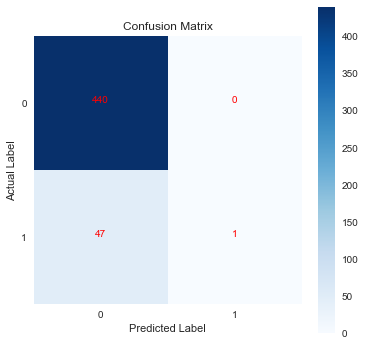

Precision                                   : 1.000
Recall                                      : 0.021
F1-Score                                    : 0.041

Precision Recall F1-Score Support Per Class : 
 (array([0.90349076, 1.        ]), array([1.        , 0.02083333]), array([0.94929881, 0.04081633]), array([440,  48]))

Classification Report                       : 
              precision    recall  f1-score   support

       False       0.90      1.00      0.95       440
        True       1.00      0.02      0.04        48

    accuracy                           0.90       488
   macro avg       0.95      0.51      0.50       488
weighted avg       0.91      0.90      0.86       488



[[427   0]
 [ 29   5]]


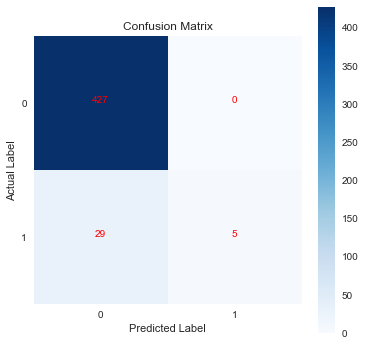

Precision                                   : 1.000
Recall                                      : 0.147
F1-Score                                    : 0.256

Precision Recall F1-Score Support Per Class : 
 (array([0.93640351, 1.        ]), array([1.        , 0.14705882]), array([0.96715742, 0.25641026]), array([427,  34]))

Classification Report                       : 
              precision    recall  f1-score   support

       False       0.94      1.00      0.97       427
        True       1.00      0.15      0.26        34

    accuracy                           0.94       461
   macro avg       0.97      0.57      0.61       461
weighted avg       0.94      0.94      0.91       461



In [8]:
sites: List[str] = list(df0["Site"].unique())
flows: List[str] = list(df0["flow"].unique())
devices: List[str] = list(df0["Device"].unique())
    
print(sites)
print(flows)
print(devices)

criteria = [
    (site, flow, device) for site in sites for flow in flows for device in devices
]

for (site, flow, device) in criteria:
    # print(f"⚪ Finding missing dates for  '({site},{flow})' on '{device}' ")

    result: pd.DataFrame = df0.query(
        f""" Site == "{site}" and flow == '{flow}' and Device == '{device}' """
    )
    if len(result.index) < 1:
        # print(f"🟢 No value found on '{site}' and flow '{flow}'\n")
        continue
        
    serie = result.set_index(["Fecha"])
    # Usaremos la conversion total como input
    s = serie["TOTAL"]
    s = validate_series(s)

    # quantile_ad = QuantileAD(high=0.97, low=0.03)
    # qad_anomalies = quantile_ad.fit_detect(s)
    # anomaly_plot(
    #     s,
    #     anomaly=qad_anomalies,
    #     anomaly_color="red",
    #     title=f" QuantileAD Plot for site {site} on flow {flow} and device {device}",
    # )
       
    # volatility_shift_ad = VolatilityShiftAD(c=2.5, side="both", window=14)
    # anomalies = volatility_shift_ad.fit_detect(s)
    # anomaly_plot(s, anomaly=anomalies, anomaly_color="red")

    # try:
    #    level_shift_ad = LevelShiftAD(c=3.0, side='both', window=14)
    #    sad_anomalies = level_shift_ad.fit_detect(s)
    #    anomaly_plot(
    #       s,
    #       anomaly=sad_anomalies,
    #       anomaly_color="red",
    #       title=f" Shift Anomaly Plot for site {site} on flow {flow} and device {device}",
    #   )   
    # except:
    #     print("An exception occurred")
    
    # esd_ad = GeneralizedESDTestAD(alpha=0.05)
    # esd_anomalies = esd_ad.fit_detect(s)
    # anomaly_plot(s, anomaly=esd_anomalies, anomaly_color="red")

    # autoregression_ad = AutoregressionAD(n_steps=7 * 2, step_size=3, c=3.0)
    # anomalies = autoregression_ad.fit_detect(s)
    # anomaly_plot(s, anomaly=anomalies, anomaly_color="red")

    # outlier_detector = OutlierDetector(LocalOutlierFactor(contamination=0.17))
    # outlier_detector = OutlierDetector(IsolationForest(contamination=0.35))
    # outlier_detector = OutlierDetector(EllipticEnvelope(contamination=0.23))

    # od_anomalies = outlier_detector.fit_detect(s.to_frame())
    # anomaly_plot(
    #    s,
    #    anomaly=od_anomalies,
    #    anomaly_color="red",
    #    title=f" OutlierDetector Plot for site {site} on flow {flow} and device {device}",
    # )
    
    min_cluster_detector = MinClusterDetector(KMeans(n_clusters=4))
    anomalies = min_cluster_detector.fit_detect(s.to_frame())
    anomaly_plot(s, anomaly=anomalies, anomaly_color="red")

    # seasonal_ad = SeasonalAD(c=3.0, side="both")
    # anomalies = seasonal_ad.fit_detect(s)
    # anomaly_plot(s, anomaly=anomalies, anomaly_color="red")

    
    Y_test = serie["anomaly"]
    Y_preds = anomalies

    confusion_matrix_plot(Y_test, Y_preds)
    print_report(Y_test, Y_preds)